# Перейдем к подготовке и визуализации данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('bmh')
%matplotlib inline

In [3]:
import random
random.seed(42)
np.random.seed(42)

In [4]:
districts = {1: 'NW', 4: 'C', 5:'N', 6:'NE', 7:'E', 8:'SE', 9:'S', 10:'SW', 11:'W'}

In [5]:
data = pd.read_csv('cian_full_data.csv')

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Distr,12,13,14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,23.839112,2.0,NaN,NaN,20.0,1.0,15.0,3964118.0,2.0,NaN,NW,47.0,1.0,152103519.0
2,1.0,1.0,23.839112,2.0,NaN,NaN,20.0,1.0,15.0,2801360.0,1.0,NaN,NW,30.0,1.0,152104745.0
3,1.0,1.0,21.923458,5.0,12.0,47.0,15.0,0.0,8.0,13800000.0,3.0,NaN,NW,82.0,0.0,152186332.0
4,1.0,1.0,23.861184,6.0,NaN,NaN,20.0,1.0,12.0,3302559.0,1.0,NaN,NW,35.0,1.0,152103863.0


Приведем данные в порядок: удалим первую нулевую строку, восстановим индексы, переименуем колонки

In [7]:
data.drop(0, axis = 0, inplace = True)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,Distr,12,13,14
1,1.0,1.0,23.839112,2.0,NaN,NaN,20.0,1.0,15.0,3964118.0,2.0,NaN,NW,47.0,1.0,152103519.0
2,1.0,1.0,23.839112,2.0,NaN,NaN,20.0,1.0,15.0,2801360.0,1.0,NaN,NW,30.0,1.0,152104745.0
3,1.0,1.0,21.923458,5.0,12.0,47.0,15.0,0.0,8.0,13800000.0,3.0,NaN,NW,82.0,0.0,152186332.0
4,1.0,1.0,23.861184,6.0,NaN,NaN,20.0,1.0,12.0,3302559.0,1.0,NaN,NW,35.0,1.0,152103863.0
5,1.0,1.0,23.839112,10.0,NaN,NaN,20.0,1.0,15.0,3310465.0,1.0,NaN,NW,34.0,1.0,152103560.0


In [9]:
data.index = [x for x in range(len(data.index))]

In [10]:
data.rename(columns={'0' : 'Bal', '1': 'Brick', '2': 'Distance', '3': 'Floor', '4': 'Kitsp', '5': 'Livsp', '6': 'Metrdist', 
                     '7': 'New', '8': 'Nfloors', '9': 'Price', '10': 'Rooms', '11': 'Tel', '12': 'Totsp', 
                     '13': 'Walk', '14': 'link'}, inplace = True)

In [11]:
data.head()

,Bal,Brick,Distance,Floor,Kitsp,Livsp,Metrdist,New,Nfloors,Price,Rooms,Tel,Distr,Totsp,Walk,link
0,1.0,1.0,23.839112,2.0,NaN,NaN,20.0,1.0,15.0,3964118.0,2.0,NaN,NW,47.0,1.0,152103519.0
1,1.0,1.0,23.839112,2.0,NaN,NaN,20.0,1.0,15.0,2801360.0,1.0,NaN,NW,30.0,1.0,152104745.0
2,1.0,1.0,21.923458,5.0,12.0,47.0,15.0,0.0,8.0,13800000.0,3.0,NaN,NW,82.0,0.0,152186332.0
3,1.0,1.0,23.861184,6.0,NaN,NaN,20.0,1.0,12.0,3302559.0,1.0,NaN,NW,35.0,1.0,152103863.0
4,1.0,1.0,23.839112,10.0,NaN,NaN,20.0,1.0,15.0,3310465.0,1.0,NaN,NW,34.0,1.0,152103560.0


In [12]:
data.shape

(5241, 16)

Посмотрим процент пропущенных данных по признакам

In [13]:
def nans_appearance(data):
    
    columns = []
    nans = data.isnull()
    for i in data.columns:
        x = nans[nans[i] == True].shape[0]
        if (x > 0):
            columns.append(i)
            print('nans in', i, ':', x, '; percentage : '"%.3f"   %(x/data.shape[0]))
            
            
    return columns

In [14]:
col_nans = nans_appearance(data)

nans in Bal : 1447 ; percentage : 0.276
nans in Brick : 511 ; percentage : 0.098
nans in Kitsp : 791 ; percentage : 0.151
nans in Livsp : 360 ; percentage : 0.069
nans in Metrdist : 346 ; percentage : 0.066
nans in Nfloors : 34 ; percentage : 0.006
nans in Tel : 2419 ; percentage : 0.462
nans in Walk : 390 ; percentage : 0.074


Число уникальных значений для этих колонок

In [15]:
def my_nunique(data, columns):
    for i in columns:
        print(str(i) + ' : ' + str(data[i].nunique()))

In [16]:
my_nunique(data, col_nans)

Bal : 5
Brick : 2
Kitsp : 214
Livsp : 606
Metrdist : 44
Nfloors : 60
Tel : 2
Walk : 2


### Итак, нужно избавить данные от пропусков. Сопоставим информацию и составим план действий. 
#### Первое, что я сделаю - выброшу признак Tel, по заданию его надо было спарсить - я спарсила, но он бесполезен для будущей модели + содержит 46% nanов, не вижу никакого смысла с ним возиться.
#### Второе: объектов, для которых неизвестно число этажей, мало - всего 0.006 от объема данных. Я эти 34 объекта тоже выкину.
#### Третье: есть признаки с малым числом возможных значений (Bal : 5 + nan = 6; Brick : 2 + nan = 3), для них я сделаю one hot encoding. Но позже (после изучения корреляций). Эта же участь постигнет категориальный Distr.
#### Четвертое: почему в предыдущий пункт не попал признак Walk? Потому что он по смыслу идет в совокупности с Metrdist. Для них я сделаю новый признак Metrokm - расстояние до метро в километрах, опираясь на известные средние скорости пешехода и автомобиля, и уже его заполню средним по округу. После признаки Walk и Metrdist тоже выброшу, как уже не нужные.
#### Пятое: Kitsp и Livsp. Пропуски в них можно компенсировать засчет поля Totsp, но для принятия какого-то решения надо для начала убедиться в адекватности находящихся в нем данных.

### Tel

In [17]:
data.drop('Tel', axis = 1, inplace = True)

### Nfloors

In [18]:
data[data['Nfloors'].isnull()].shape

(34, 15)

In [19]:
data = data[data['Nfloors'] > 0]
data.index = [x for x in range(len(data.index))]
data.shape

(5207, 15)

### Metrdist, Walk

In [20]:
data['Metrokm'] = np.nan

Учитывая, что средняя скорость пешехода 4 км/ч, а машины 50 км/ч, заполним столбец со значениями предполагаемых километров до метро (помним, что metrdist содержит информацию в минутах)

In [21]:
for i in range(data.shape[0]):
    if (data['Walk'][i] == 1.):
        data['Metrokm'][i] = 4/60 * data['Metrdist'][i]
    elif (data['Walk'][i] == 0.):
        data['Metrokm'][i] = 5/6 * data['Metrdist'][i]

Посмотрим процент странных значений и выбросим эти данные, если он будет мал

In [23]:
data[data['Metrokm'] > 17].shape[0]/data.shape[0]

0.0042250816208949495

In [24]:
data = data[(data['Metrokm'] <= 17) | (data['Metrokm'].isnull())]
data.index = [x for x in range(len(data.index))]

Посчитаем среднее значение по округу, заполним пропуски

In [25]:
metrokms_distr=[]

for i in districts.values():
    tmp = data[data['Distr'] == i]
    med = tmp['Metrokm'].median()
    
    metrokms_distr.append(med)

In [26]:
tmp = []
ind = 0
for i in districts.keys():
    tmp.append((districts.get(i), metrokms_distr[ind]))
    ind += 1
    
tmp = dict(tmp)
tmp

{'C': 0.4666666666666667,
 'E': 1.0,
 'N': 1.0,
 'NE': 0.8,
 'NW': 0.6666666666666666,
 'S': 0.6666666666666666,
 'SE': 1.1333333333333333,
 'SW': 0.8666666666666667,
 'W': 1.1333333333333333}

In [27]:
for i in districts.values():
    for j in range(data.shape[0]):
        if (data['Distr'][j] == i):
            if (not(data['Metrokm'][j] >= 0)):
                value = tmp.get(i)
                data['Metrokm'][j] = value

In [29]:
data.drop(['Metrdist', 'Walk'], axis = 1, inplace = True)

In [30]:
nans_appearance(data)

nans in Bal : 1436 ; percentage : 0.277
nans in Brick : 477 ; percentage : 0.092
nans in Kitsp : 766 ; percentage : 0.148
nans in Livsp : 345 ; percentage : 0.067


['Bal', 'Brick', 'Kitsp', 'Livsp']

### Для понимания того, как работать с Kitsp и Livsp, изучим обязательное поле Totsp. Посмотрим на минимум и максимум, посмотрим на распределение.

In [31]:
totsps = data['Totsp'].unique()
totsps.sort()

In [32]:
print('min =', totsps.min(), '; max =', totsps.max())

min = 11.0 ; max = 613.0


In [33]:
count_totsps = []
for i in totsps:
    count_totsps.append(data[data['Totsp'] == i].shape[0])

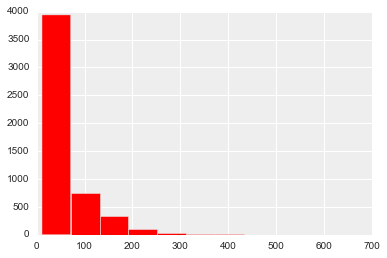

In [34]:
plt.hist(data['Totsp'], color='r')
plt.show()

Посмотрю на то, что кроется за краевыми значениями

In [35]:
data[data['Totsp'] < 18]['link']

205     151825967.0
206     151281232.0
471     150346368.0
472     151004941.0
489     152208139.0
532     152205228.0
1667    151875176.0
1668    151875136.0
1699    151970631.0
2334    151978685.0
2335    151993440.0
2462    152197203.0
2463    151893649.0
2464     43369704.0
2465    151328081.0
2780    148985302.0
2781    152069016.0
2811    150692460.0
3612    152010622.0
3892    152037753.0
3893    152207277.0
3920    152113078.0
3922    152034231.0
3924    152039319.0
4064    151490145.0
Name: link, dtype: float64

#### Бывают квартиры общей площадью 11 м.кв., например. Во-первых, по фотографиям видно, что это не так, во-вторых, есть некоторые закрепленные нормы на минимальную площадь жилого помещения, и это около 20 кв.м. В-третьих, странных квартир мало, так что я их просто удалю.

#### Также удалю слишком большие квартиры, если их будет достаточно мало, так как для наших данных они скорее представляют выбросы. И вряд ли мы сможем нормально прогнозировать цену на элитное жилье с таким датасетом, не будем прыгать выше головы (и заодно позаботимся об уменьшении ошибки будущих моделей)

In [36]:
data[data['Totsp'] < 20].shape[0]/data.shape[0]

0.007328833172613307

In [37]:
data = data[data['Totsp'] >= 20]
data.index = [x for x in range(len(data.index))]

In [38]:
data[data['Totsp'] > 320].shape[0]/data.shape[0]

0.004080046629104332

In [39]:
data = data[data['Totsp'] < 320]
data.index = [x for x in range(len(data.index))]

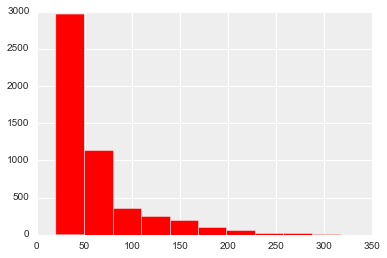

In [40]:
plt.hist(data['Totsp'], color='r')
plt.show()

#### Что теперь можно делать с этой информацией? Нам надо заполнить пропуски в Kitsp и Livsp. Можно предположить линейную зависимость этих параметров от Totsp и попробовать использовать линейную модель для заполнения nanов. Да, линейная модель предскажет значения с ошибками, но если заполнять пропуски без нее, то ошибки тоже будут. А у нее они будут наверняка поменьше, чем у какого-нибудь обычного заполнения медианой.

In [41]:
data.shape

(5125, 14)

In [42]:
train = data[data['Kitsp'] > 0]
train.shape

(4382, 14)

In [43]:
test = data[data['Kitsp'].isnull()]
test.shape

(743, 14)

In [44]:
X = train['Totsp']
X = X.reshape((X.shape[0],1))
Y = train['Kitsp']
Y = Y.reshape((Y.shape[0],1))
X_test = test['Totsp']
X_test = X_test.reshape((X_test.shape[0],1))

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
Xtr, Xval, Ytr, Yval = train_test_split(X, Y, test_size = 0.2)
model_kitchen = LinearRegression(normalize = True)
model_kitchen.fit(Xtr, Ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [48]:
pred = model_kitchen.predict(Xval)

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('rmse:', sqrt(mean_squared_error(Yval, pred)))

rmse: 3.9107497132410636


In [50]:
Y_test = model_kitchen.predict(X_test)

ind = 0
for i in range(data.shape[0]):
    if (not(data['Kitsp'][i] >= 0)):
        data['Kitsp'][i] = Y_test[ind]
        ind += 1

In [52]:
nans_appearance(data)

nans in Bal : 1401 ; percentage : 0.273
nans in Brick : 466 ; percentage : 0.091
nans in Livsp : 338 ; percentage : 0.066


['Bal', 'Brick', 'Livsp']

In [53]:
train = data[data['Livsp'] > 0]
train.shape

(4787, 14)

In [54]:
test = data[data['Livsp'].isnull()]
test.shape

(338, 14)

In [55]:
X = train['Totsp']
X = X.reshape((X.shape[0],1))
Y = train['Livsp']
Y = Y.reshape((Y.shape[0],1))
X_test = test['Totsp']
X_test = X_test.reshape((X_test.shape[0],1))

In [57]:
Xtr, Xval, Ytr, Yval = train_test_split(X, Y, test_size = 0.1)
model_liv = LinearRegression()
model_liv.fit(Xtr, Ytr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
pred = model_liv.predict(Xval)
print('rmse:', sqrt(mean_squared_error(Yval, pred)))

rmse: 9.077397896517027


In [59]:
Y_test = model_liv.predict(X_test)

ind = 0
for i in range(data.shape[0]):
    if (not(data['Livsp'][i] >= 0)):
        data['Livsp'][i] = Y_test[ind]
        ind += 1

Посмотрим на получившиеся распределения

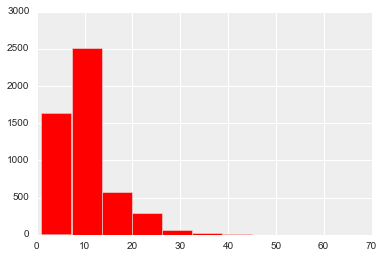

In [61]:
plt.hist(data['Kitsp'], color = 'r')
plt.show()

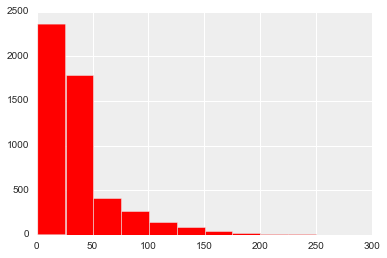

In [62]:
plt.hist(data['Livsp'], color = 'r')
plt.show()

Снова удалим маленький процент странных данных

In [63]:
data[data['Kitsp'] < 4].shape

(14, 14)

In [64]:
data = data[data['Kitsp'] >= 4]
data.index = [x for x in range(len(data.index))]

In [65]:
data[data['Livsp'] < 10].shape

(9, 14)

In [66]:
data = data[data['Livsp'] >= 10]
data.index = [x for x in range(len(data.index))]

In [67]:
nans_appearance(data)

nans in Bal : 1392 ; percentage : 0.273
nans in Brick : 464 ; percentage : 0.091


['Bal', 'Brick']

### Теперь изучим данные на общую адекватность. Начнем с распределения цен.

In [70]:
print('min: ', data['Price'].min(), '; max:', data['Price'].max())

min:  6800.0 ; max: 554340000.0


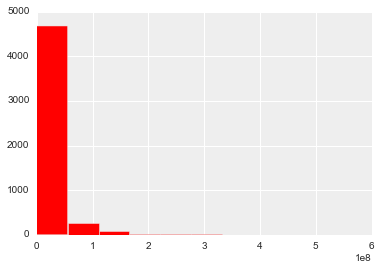

In [71]:
plt.hist(data['Price'], color = 'r')
plt.show()

Так данные выглядеть не должны. Сначала уберу outliers, при построении модели попробую поработать с логарифмом от цены.

In [72]:
data[data['Price'] < 1500000].shape[0]

3

In [73]:
data.drop(data[data['Price'] < 1500000].index, inplace = True)
data.index = [x for x in range(len(data.index))]

In [74]:
data[data['Price'] > 200000000].shape[0]/data.shape[0]

0.009609727397528927

In [75]:
data.drop(data[data['Price'] > 200000000].index, inplace = True)
data.index = [x for x in range(len(data.index))]

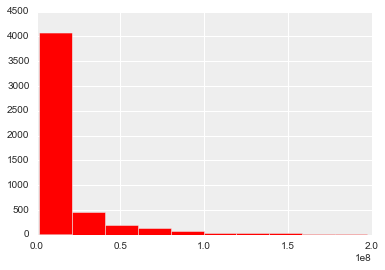

In [76]:
plt.hist(data['Price'], color = 'r')
plt.show()

Изучим данные по этажам

In [77]:
data[data['Nfloors'] < data['Floor']].shape

(0, 14)

Номер этажа нигде не больше этажности дома, уже неплохо)

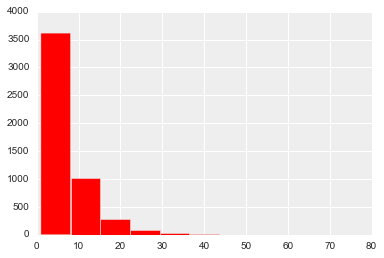

In [78]:
plt.hist(data['Floor'], color = 'r')
plt.show()

Не понятно наличие хвоста. Посмотрим на него

In [79]:
tmp = data[data['Floor'] > 40]
tmp[['Floor', 'link']]

,Floor,link
728,72.0,152142555.0
745,49.0,150882667.0
753,71.0,150648547.0
760,47.0,150383479.0
767,47.0,150891338.0
769,56.0,151131184.0
4107,41.0,151570338.0
4809,45.0,151522534.0


Это реальные данные, но их мало и они сильно портят распределение, уберем их

In [80]:
data.drop(data[data['Floor'] > 40].index, inplace = True)
data.index = [x for x in range(len(data.index))]

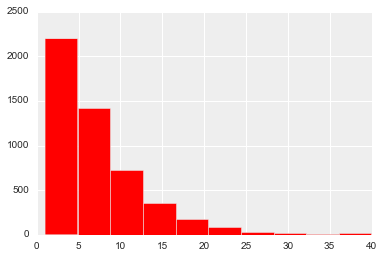

In [81]:
plt.hist(data['Floor'], color = 'r')
plt.show()

Так лучше. Посмотрим на распределение Nfloors

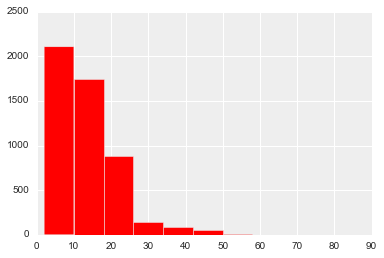

In [82]:
plt.hist(data['Nfloors'], color = 'r')
plt.show()

In [83]:
data[data['Nfloors'] > 50].shape[0]/data.shape[0]

0.0031733439111463705

Аналогично

In [84]:
data.drop(data[data['Nfloors'] > 50].index, inplace = True)
data.index = [x for x in range(len(data.index))]

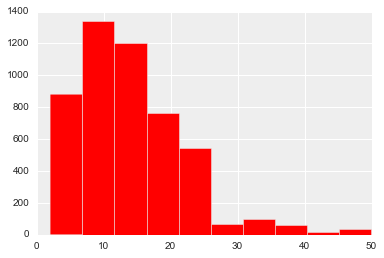

In [85]:
plt.hist(data['Nfloors'], color = 'r')
plt.show()

### Теперь посмотрим на распределение числа комнат

In [86]:
rooms = data['Rooms'].unique()
rooms.sort()

In [87]:
count_rooms = []

for i in rooms:
    tmp = data[data['Rooms'] == i]
    count_rooms.append(tmp.shape[0])

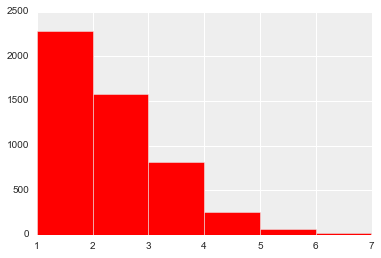

In [88]:
width = 1
plot = plt.bar(rooms, count_rooms, width, color='r')
plt.show()

### Теперь на распределение расстояний до центра города

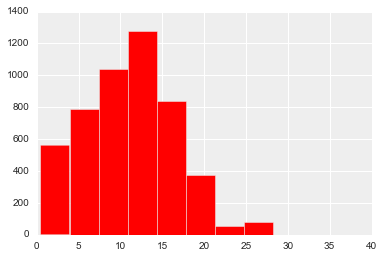

In [89]:
plt.hist(data['Distance'], color='r')
plt.show()

Снова изучим хвост ( > 28 )

In [90]:
data[data['Distance'] > 28].shape[0]

8

In [91]:
tmp = data[data['Distance'] > 28]
tmp[['Distance', 'link']]

,Distance,link
844,29.412505,151894585.0
2155,35.165395,148421723.0
4289,28.130938,152085424.0
4290,28.147659,151059187.0
4293,28.146755,150678616.0
4300,28.065599,150338028.0
4304,28.065599,151636087.0
4311,28.096655,149833775.0


#### Вот здесь уже появляется странная информация. Например, реальный адрес по Одинцовскому району Московской области, но при этом указано м. Парк Победы. Да, от него наверное удобно добираться, если ехать из Москвы. Но это не отменяет того, что на самом деле поездка такая будет ИЗ Москвы и уже в Подмосковье.
#### Или еще пример - 10 минут на машине от м. Алтуфьево, мкр. Северный. Открываем карту - это Северный мкр. Домодедово. При чем тут Алтуфьево? При чем тут Москва?
#### В общем квартиры по-настоящему далеко. Их мало. Они разные (есть Рублевское направление, есть Домодедово). Обучиться на них хорошо предсказывать цену на удаленные от центра квартиры мы не сможем. Так что я хочу определить максимальную удаленность границы рассматриваемых округов от центра города и оценить объем данных, не проходящих этот порог.

In [92]:
data[data['Distance'] > 27].shape[0]/data.shape[0]

0.006366892160764027

Прикинув по карте, получила 27. Не проходящих порог данных меньше 1%, удаляю их.

In [93]:
data = data[data['Distance'] <= 27]
data.index = [x for x in range(len(data.index))]

Снова посмотрим на распределение

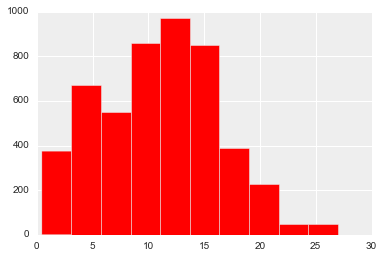

In [94]:
plt.hist(data['Distance'], color='r')
plt.show()

Стало лучше.

### Теперь поищем корреляции в данных, построим немного графиков.

In [95]:
data.columns

Index(['Bal', 'Brick', 'Distance', 'Floor', 'Kitsp', 'Livsp', 'New', 'Nfloors',
       'Price', 'Rooms', 'Distr', 'Totsp', 'link', 'Metrokm'],
      dtype='object')

In [96]:
data_corr = data[['Distance', 'Floor', 'Kitsp', 'Livsp', 'New', 'Nfloors', 'Price',
       'Rooms', 'Totsp', 'Metrokm']]

In [97]:
correlation = data_corr.corr()

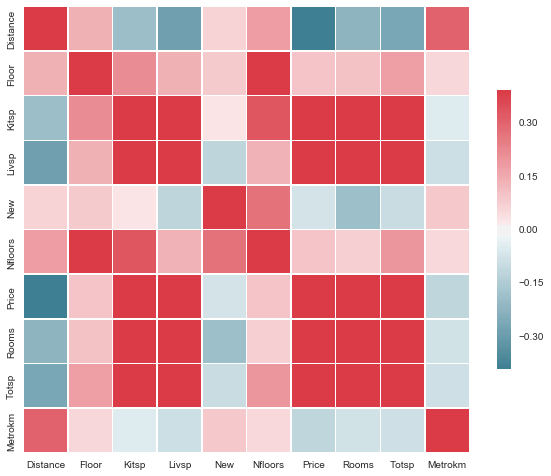

In [98]:
f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, cmap=cmap, vmax=.3,
            square=True, xticklabels=correlation.columns.values, 
            yticklabels=correlation.columns.values,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Видна положительная корреляция цены с площадями и числом комнат, а также отрицательная с расстоянием до центра. Выглядит понятно

Посмотрим на зависимость цены от количества комнат

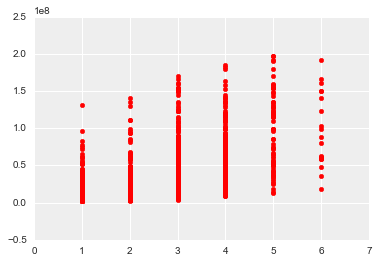

In [99]:
plot = plt.scatter(data['Rooms'], data['Price'], color = 'r')
plt.show()

Чем больше комнат, тем больше цена, многокомнатных меньше, чем других вариантов

Теперь построим аналогичный график для расстояний от центра города

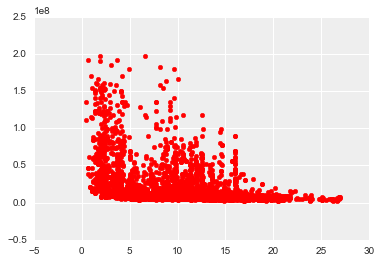

In [100]:
plot = plt.scatter(data['Distance'], data['Price'], color = 'r')
plt.show()

Чем больше расстояние до центра, тем меньше цена

Теперь посмотрим на зависимость цены от общей площади

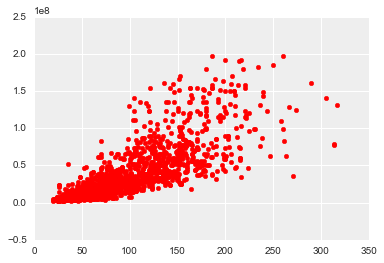

In [101]:
plot = plt.scatter(data['Totsp'], data['Price'], color = 'r')
plt.show()

Чем больше площадь, тем больше цена

И напоследок посмотрим на зависимость цены от округа

In [102]:
prices_distr = []

for i in districts.keys():
    tmp = data[data['Distr'] == districts.get(i)]
    price = tmp['Price'].median()
    prices_distr.append(price)

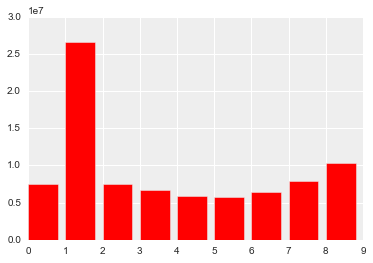

In [103]:
plot = plt.bar(range(9), prices_distr, color='r')
plt.show()

In [104]:
districts

{1: 'NW', 4: 'C', 5: 'N', 6: 'NE', 7: 'E', 8: 'SE', 9: 'S', 10: 'SW', 11: 'W'}

С большим отрывом лидирует ЦАО

### Вспомним, что хотели сделать one hot encoding для некоторых признаков, выбросим после этого их и ссылки

In [105]:
to_encode = ['Bal', 'Brick', 'Distr']
data[to_encode] = data[to_encode].fillna(value = 'na')

In [106]:
onehots = pd.get_dummies(data[to_encode])
onehots.head()
data = pd.concat([data, onehots], axis=1)

In [107]:
data.columns

Index(['Bal', 'Brick', 'Distance', 'Floor', 'Kitsp', 'Livsp', 'New', 'Nfloors',
       'Price', 'Rooms', 'Distr', 'Totsp', 'link', 'Metrokm', 'Bal_0.0',
       'Bal_1.0', 'Bal_2.0', 'Bal_3.0', 'Bal_4.0', 'Bal_na', 'Brick_0.0',
       'Brick_1.0', 'Brick_na', 'Distr_C', 'Distr_E', 'Distr_N', 'Distr_NE',
       'Distr_NW', 'Distr_S', 'Distr_SE', 'Distr_SW', 'Distr_W'],
      dtype='object')

In [108]:
data.drop(to_encode, axis = 1, inplace = True)

In [109]:
data.drop('link', axis = 1, inplace = True)

In [110]:
data.shape

(4994, 28)

### И сохраним данные. Остальное в следующем ноутбуке

In [111]:
data.to_csv('cian_data_clear_for_modeling.csv', index = False)